### **Load and Test-Train Split the Data**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **Train a Binary Classifier**

In [2]:
from sklearn.linear_model import SGDClassifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

---

### Step 1: Get Decision Scores (Instead of Predictions)
* Use `cross_val_predict` to get decision scores for each instance using 3-fold CV.

In [3]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function"
)

### Step 2: Calculate Precision and Recall for All Thresholds
* Use `precision_recall_curve` to generate all precision/recall pairs for all possible thresholds.

In [4]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### Step 3: Plot Precision and Recall vs Threshold
* Visualize how precision and recall change as you adjust the decision threshold.

**Observe:**

* **"Precision generally increases with a higher threshold"**
* **"Recall decreases as threshold increases"**

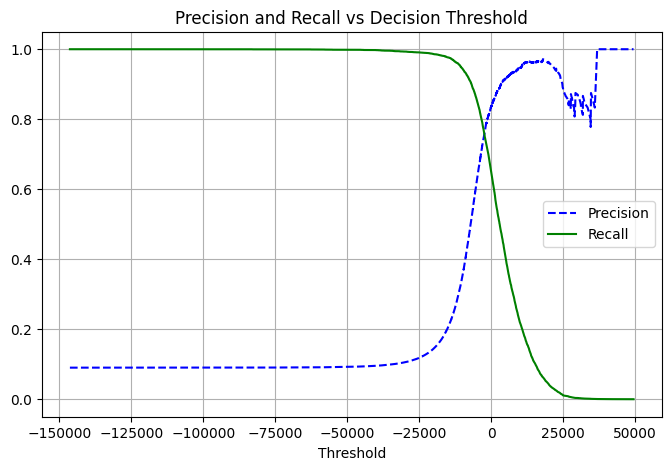

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision and Recall vs Decision Threshold")
plt.show()

### Step 4: Plot Precision vs Recall (No Threshold)
* This gives a cleaner view of the trade-off without involving thresholds.

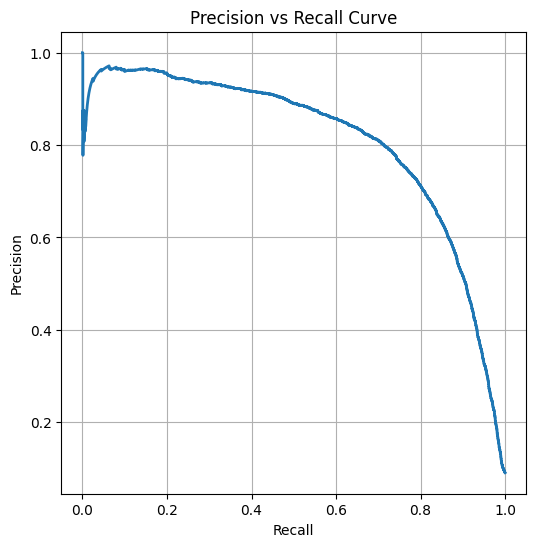

In [6]:
plt.figure(figsize=(6, 6))
plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title("Precision vs Recall Curve")
plt.show()

### Step 5: Choose a Threshold for Desired Precision
* Suppose we want at least 90% precision. We can find the corresponding threshold:

In [14]:
import numpy as np

target_precision = 0.90
idx = (precisions >= target_precision).argmax()
threshold_90 = thresholds[idx]

### Step 6: Make Predictions Using the New Threshold
* Instead of using `predict()`, use the decision scores and threshold directly.

In [15]:
y_train_pred_90 = (y_scores >= threshold_90)

### Step 7: Evaluate Final Precision and Recall
* Check if your new classifier meets the desired precision and what the recall is.

In [16]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred_90))  # Should be >= 0.90
print(recall_score(y_train_5, y_train_pred_90))    # Will likely be lower

0.9000345901072293
0.4799852425751706
